<center>
<img src="https://github.com/baumanproject/matstat-AB/blob/main/week05_LLN_CLT/data/logo.png?raw=1" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [ ]:
import scipy.stats as sts

In [ ]:
num_observations = 10**6

In [ ]:
pois = sts.poisson(2)

In [ ]:
distr = pois.rvs(num_observations)

(array([1.35279e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.70612e+05,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.71342e+05, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.80474e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 8.98410e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.61790e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.18910e+04,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.31500e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

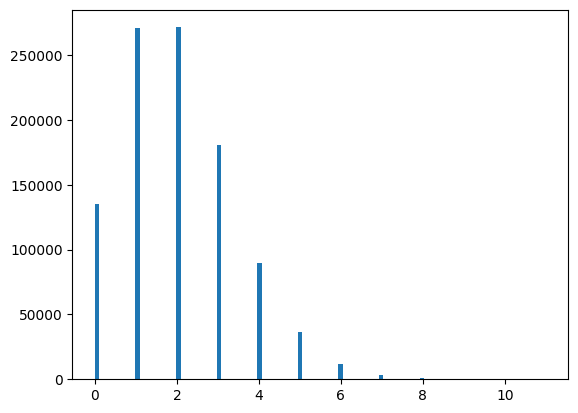

In [ ]:
plt.hist(distr, bins=100)

In [ ]:
sum([i for i in distr])/len(distr)

1.998386

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans1 = sum(distr>6)/len(distr)
ans2 = len([_ for i in distr if i> 5])/len(distr)
ans3 = len([_ for i in distr if i> 5 and i < 7])/len(distr)
ans4 = sum([i**3 for i in distr])/len(distr)
ans5 = sum([i**3 for i in distr if i>5])/len(distr)

# your code here
print(ans1)
print(ans2)
print(ans3)
print(ans4)
print(ans5)

0.004382
0.016273
0.011891
21.911522
4.325177


In [ ]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

# Похожие тесты скрыты от вас

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [ ]:
import scipy.stats as sts

In [ ]:
obj_amount = 10**6

In [ ]:
uniform_dist = sts.uniform(1,3).rvs(obj_amount)

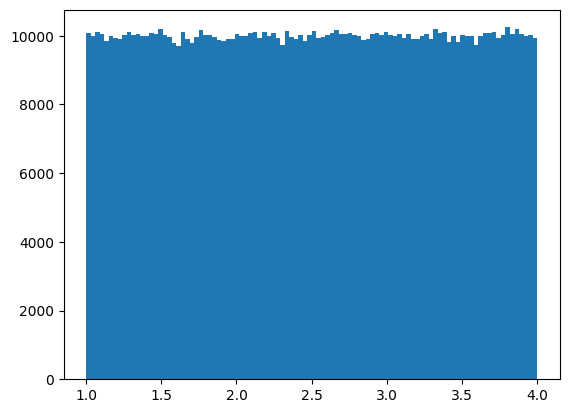

In [ ]:
plt.hist(uniform_dist, bins = 100)
plt.show()

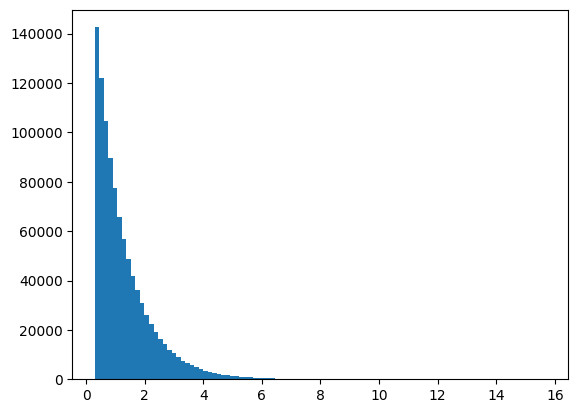

In [ ]:
error = sts.expon(0.3).rvs(obj_amount)
plt.hist(error, bins = 100)
plt.show()

In [ ]:
ans6 = 2*(sum(error<=1.5)/len(error))*(sum(uniform_dist>1.5)/len(uniform_dist))*(sum(uniform_dist<=1.5)/len(uniform_dist))

In [ ]:
ans6

0.19423479970691998

In [ ]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [103]:
import scipy.stats as sts
import numpy as np

n_obj = 10**6
x = sts.uniform(0,1).rvs(n_obj)
y_distr = np.exp((np.sqrt(x))*(np.log(10)))

In [104]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

theta = 10
alpha = 2

ans7 = sum(y_distr)/len(y_distr)

# your code here


In [105]:
ans7

5.291719986346612

In [120]:
x = np.linspace(1, 10, 10**6, endpoint=False)

In [121]:
len(x)

1000000

In [132]:
analytic = (2*(np.log(10)**(-2))*np.log(x)/x)*len(x)/10

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

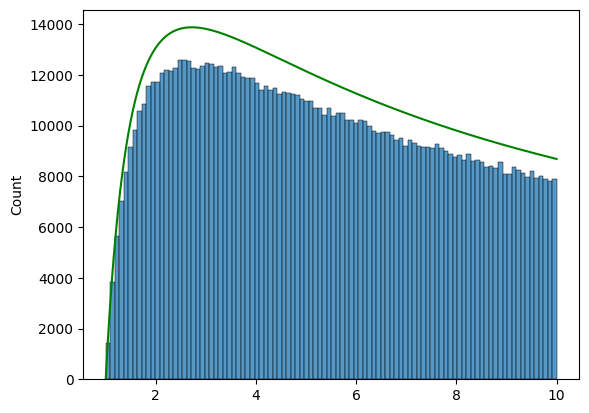

In [133]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
import seaborn as sns
# your code here
plt.plot(x,analytic, color = 'green')
sns.histplot(y_distr, bins = 100)
plt.show()

In [99]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you